Read Data
Selecting  88
Training...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Validation score  0.757806054849
Validation score  0.766155846104
Validation score  0.769655758606
Validation score  0.770155746106
Validation score  0.773630659234
Validation score  0.772355691108


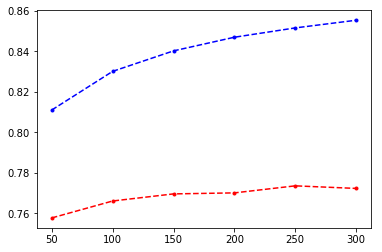

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import csv

from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest

print('Read Data')
# Read train file
un_trainX = numpy.genfromtxt("trainless.csv", delimiter=',')
n_trainX = un_trainX #/ un_trainX.max(axis=0)
trainLabel = numpy.genfromtxt("trainLabelless.csv", delimiter=',')
# Read validation file
un_testX = numpy.genfromtxt("validation.csv", delimiter=',')
n_testX = un_testX #/ un_trainX.max(axis=0)
testLabel = numpy.genfromtxt("validationLabel.csv", delimiter=',')
# Read test file
un_testdata = numpy.genfromtxt("test.csv", delimiter=',')
n_testdata = un_testdata #/ un_trainX.max(axis=0)

# Select features
k = [88]
maX = 0
for j in range(len(k)):
    print('Selecting ', k[j])
    selection = SelectKBest(k=k[j]).fit(n_trainX, trainLabel)
    n_trainX_new = selection.transform(n_trainX)
    n_testX_new = selection.transform(n_testX)
    n_testdata_new = selection.transform(n_testdata)

    print('Training...')
    iter = [50,100,150,200,250,300]
    training = []
    validation = []
    for i in range(len(iter)):
        mlp = MLPClassifier(verbose=0, random_state=0, max_iter=iter[i], activation='relu',
                            solver='adam', learning_rate_init=0.00005,alpha=0.0001,hidden_layer_sizes=(80,))


        mlp.fit(n_trainX_new, trainLabel)
        training.append(mlp.score(n_trainX_new, trainLabel))
        validation.append(mlp.score(n_testX_new, testLabel))
        print('Validation score ', validation[i])
        if (validation[i] > 0.90):
            maX = validation[i]
            print('Predict and write to file```````````````')
            result = mlp.predict(n_testdata_new)
            numpy.savetxt('result.csv', result, delimiter=',', fmt='%d')
            print('Complete!!!')

    plt.plot(iter, validation, 'r--.')
    plt.plot(iter, training, 'b--.')
    plt.show()


In [7]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import csv

from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.neural_network import BernoulliRBM

print('Read Data')
# Read train file
un_trainX = numpy.genfromtxt("trainfull.csv", delimiter=',')
n_trainX = un_trainX / un_trainX.max(axis=0)
trainLabel = numpy.genfromtxt("trainLabelfull.csv", delimiter=',')
# Read validation file
un_testX = numpy.genfromtxt("validation.csv", delimiter=',')
n_testX = un_testX / un_trainX.max(axis=0)
testLabel = numpy.genfromtxt("validationLabel.csv", delimiter=',')
# Read test file
un_testdata = numpy.genfromtxt("test.csv", delimiter=',')
n_testdata = un_testdata / un_trainX.max(axis=0)

# Select features
k = [88]
maX = 0
for j in range(len(k)):
    print('Selecting ', k[j])
    selection = SelectKBest(k=k[j]).fit(n_trainX, trainLabel)
    n_trainX_new = selection.transform(n_trainX)
    n_testX_new = selection.transform(n_testX)
    n_testdata_new = selection.transform(n_testdata)

    print('Training...')
    iter = [100,150,200,250,300]
    training = []
    validation = []
    for i in range(len(iter)):
        mlp = BernoulliRBM(verbose=0, random_state=0)


        mlp.fit(n_trainX_new, trainLabel)
        training.append(mlp.score(n_trainX_new, trainLabel))
        validation.append(mlp.score(n_testX_new, testLabel))
        print('Validation score ', training[i])
        if (training[i] > 0.80):
            maX = training[i]
            print('Predict and write to file```````````````')
            result = mlp.predict(n_testdata_new)
            numpy.savetxt('result.csv', result, delimiter=',', fmt='%d')
            print('Complete!!!')

    plt.plot(iter, validation, 'r--.')
    plt.plot(iter, training, 'b--.')
    plt.show()

Read Data
Selecting  88
Training...


AttributeError: 'BernoulliRBM' object has no attribute 'score'